In [2]:
# importing the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

#manipulating the default plot size
# plt.rcParams['figure.figsize'] = 10,12
plt.rcParams['figure.figsize']=25,18
#Disable warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#here we are binding plotly and pandas together so we can work on jupyter notebook bcoz plotly has its own library
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [5]:
df = pd.read_csv(r'covid_19_data.csv')
df.head(200)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
195,196,01/26/2020,Yunnan,Mainland China,1/26/20 16:00,16.0,0.0,0.0
196,197,01/26/2020,Heilongjiang,Mainland China,1/26/20 16:00,15.0,1.0,0.0
197,198,01/26/2020,Tianjin,Mainland China,1/26/20 16:00,14.0,0.0,0.0
198,199,01/26/2020,Hebei,Mainland China,1/26/20 16:00,13.0,1.0,0.0


In [6]:
df.rename(columns={'Country/Region':'Country'},inplace=True)

In [7]:
df.rename(columns={'Province/State':'State'},inplace=True)

In [8]:
df.tail()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [9]:
df.head()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   State            228329 non-null  object 
 3   Country          306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [11]:
df.isnull().sum()

SNo                    0
ObservationDate        0
State              78100
Country                0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [12]:
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,306429.000000,3.064290e+05,306429.000000,3.064290e+05
mean,153215.000000,8.567091e+04,2036.403268,5.042029e+04
std,88458.577156,2.775516e+05,6410.938048,2.015124e+05
min,1.000000,-3.028440e+05,-178.000000,-8.544050e+05
25%,76608.000000,1.042000e+03,13.000000,1.100000e+01
50%,153215.000000,1.037500e+04,192.000000,1.751000e+03
75%,229822.000000,5.075200e+04,1322.000000,2.027000e+04
max,306429.000000,5.863138e+06,112385.000000,6.399531e+06


# Data Visualization

In [11]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
confirmed

,ObservationDate,Confirmed
0,01/01/2021,84092619.0
1,01/02/2021,84718978.0
2,01/03/2021,85251774.0
3,01/04/2021,85805892.0
4,01/05/2021,86546014.0
...,...,...
489,12/27/2020,80912611.0
490,12/28/2020,81408934.0
491,12/29/2020,82073362.0
492,12/30/2020,82834592.0


In [12]:
#plotly
confirmed.iplot(kind='bar',x='ObservationDate',y='Confirmed',xTitle='ObesrvationDate',yTitle='Confirmed')

In [13]:
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
deaths

,ObservationDate,Deaths
0,01/01/2021,1834675.0
1,01/02/2021,1843108.0
2,01/03/2021,1850449.0
3,01/04/2021,1860598.0
4,01/05/2021,1875953.0
...,...,...
489,12/27/2020,1771659.0
490,12/28/2020,1781415.0
491,12/29/2020,1796786.0
492,12/30/2020,1811843.0


In [14]:
deaths.iplot(kind='bar',x='ObservationDate',y='Deaths',xTitle='ObservationDate',yTitle='Deaths')

In [15]:
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()
recovered

,ObservationDate,Recovered
0,01/01/2021,47313005.0
1,01/02/2021,47614297.0
2,01/03/2021,47882779.0
3,01/04/2021,48173187.0
4,01/05/2021,48488548.0
...,...,...
489,12/27/2020,45717710.0
490,12/28/2020,46016136.0
491,12/29/2020,46369231.0
492,12/30/2020,46757476.0


In [16]:
recovered.iplot(kind='bar',x='ObservationDate',y='Recovered',xTitle='ObservationDate',yTitle='Recovered')

# Making the Prediction using FB Prophet

In [17]:
from fbprophet import Prophet


In [18]:
df.head()

,SNo,ObservationDate,State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [19]:
confirmed = df.groupby('ObservationDate').sum()['Confirmed'].reset_index()
deaths = df.groupby('ObservationDate').sum()['Deaths'].reset_index()
recovered = df.groupby('ObservationDate').sum()['Recovered'].reset_index()


In [20]:
confirmed.tail(10)

,ObservationDate,Confirmed
484,12/22/2020,78134244.0
485,12/23/2020,78829366.0
486,12/24/2020,79496006.0
487,12/25/2020,79961556.0
488,12/26/2020,80474158.0
489,12/27/2020,80912611.0
490,12/28/2020,81408934.0
491,12/29/2020,82073362.0
492,12/30/2020,82834592.0
493,12/31/2020,83559601.0


In [21]:
deaths.tail(10)

,ObservationDate,Deaths
484,12/22/2020,1722999.0
485,12/23/2020,1736628.0
486,12/24/2020,1748259.0
487,12/25/2020,1756861.0
488,12/26/2020,1764260.0
489,12/27/2020,1771659.0
490,12/28/2020,1781415.0
491,12/29/2020,1796786.0
492,12/30/2020,1811843.0
493,12/31/2020,1825012.0


In [22]:
recovered.tail(10)

,ObservationDate,Recovered
484,12/22/2020,44086740.0
485,12/23/2020,44410880.0
486,12/24/2020,44725552.0
487,12/25/2020,45017158.0
488,12/26/2020,45425322.0
489,12/27/2020,45717710.0
490,12/28/2020,46016136.0
491,12/29/2020,46369231.0
492,12/30/2020,46757476.0
493,12/31/2020,47032627.0


The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [23]:
confirmed.columns=['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [24]:
confirmed.head()

,ds,y
0,2021-01-01,84092619.0
1,2021-01-02,84718978.0
2,2021-01-03,85251774.0
3,2021-01-04,85805892.0
4,2021-01-05,86546014.0


In [25]:
confirmed.tail()

,ds,y
489,2020-12-27,80912611.0
490,2020-12-28,81408934.0
491,2020-12-29,82073362.0
492,2020-12-30,82834592.0
493,2020-12-31,83559601.0


# 4.1 Forecasting Confirmed NCOVID-19 Cases Worldwide with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [26]:
pd.set_option('display.max_rows',None)
pd.set_option('display.float_format',lambda x: '%.3f'%x)

In [27]:
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=131)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
future.tail(100)

,ds
525,2021-06-30
526,2021-07-01
527,2021-07-02
528,2021-07-03
529,2021-07-04
530,2021-07-05
531,2021-07-06
532,2021-07-07
533,2021-07-08
534,2021-07-09


The predict method will assign each row in future a predicted value which it names yhat. If you pass in historical dates, it will provide an in-sample fit. The forecast object here is a new dataframe that includes a column yhat with the forecast, as well as columns for components and uncertainty intervals

In [30]:
#predicting the future with date, and upper and lower limit o f y value
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
525,2021-06-30,188775348.061,184382150.300,193911001.797
526,2021-07-01,189448066.384,184218656.782,194935192.663
527,2021-07-02,190110737.199,184998016.101,195583364.257
528,2021-07-03,190729365.822,185251725.070,196298474.508
529,2021-07-04,191288294.869,185857887.390,197602216.579
530,2021-07-05,191859037.506,186174771.926,198012637.484
531,2021-07-06,192482863.341,186589285.340,198776819.606
532,2021-07-07,193143184.434,186590211.765,199971932.644
533,2021-07-08,193815902.758,186924745.950,200745070.738
534,2021-07-09,194478573.573,188104299.100,201327799.388


you can plot the forecast by calling the prophet.plot method and passing in your forecat dataframe.

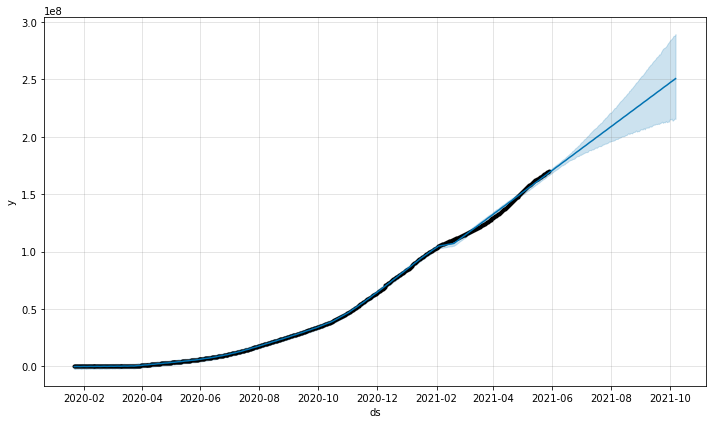

In [31]:
confirmed_forecast_plot = m.plot(forecast)

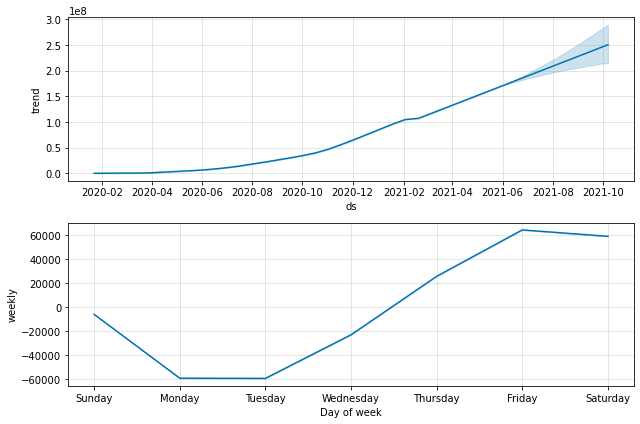

In [32]:
confirmed_forecast_plot = m.plot_components(forecast)

In [33]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])


In [35]:
m = Prophet(interval_width=0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
620,2021-10-03
621,2021-10-04
622,2021-10-05
623,2021-10-06
624,2021-10-07


In [36]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
525,2021-06-30,3847310.979,3770271.862,3929763.430
526,2021-07-01,3859302.921,3766657.136,3941080.224
527,2021-07-02,3871112.660,3781802.757,3961731.238
528,2021-07-03,3881644.220,3793144.385,3972112.598
529,2021-07-04,3890007.090,3793288.708,3985727.863
530,2021-07-05,3899533.845,3796460.532,3999203.310
531,2021-07-06,3911609.919,3805643.142,4014142.033
532,2021-07-07,3923866.938,3815027.175,4033337.021
533,2021-07-08,3935858.880,3829207.290,4049965.347
534,2021-07-09,3947668.620,3830302.534,4058031.326


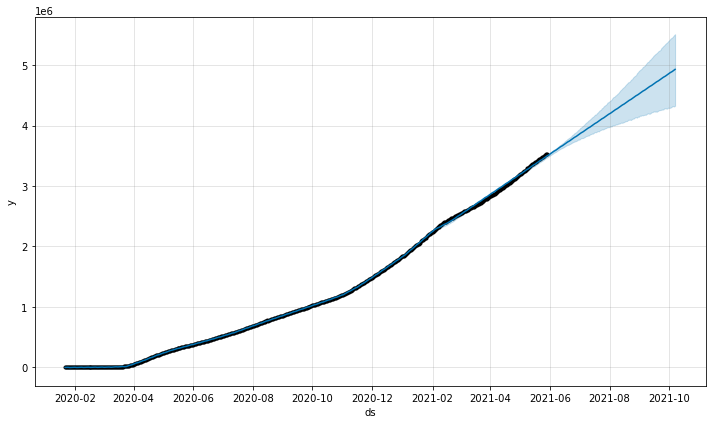

In [37]:
deaths_forecast_plot = m.plot(forecast)

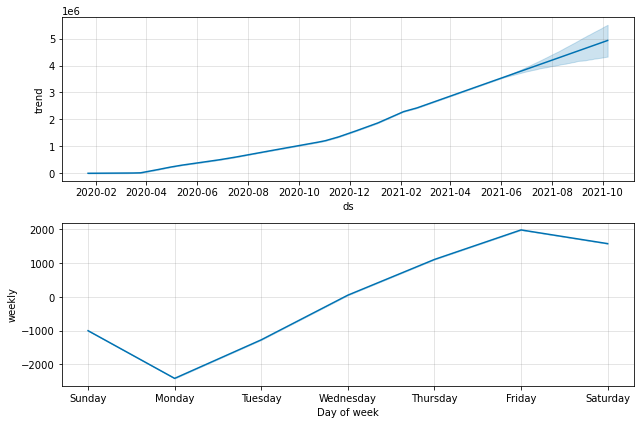

In [38]:
deaths_forecast_plot = m.plot_components(forecast)

# 4.3 Forecasting Worldwide Recovered Cases with Prophet (Base model)

Generating a week ahead forecast of confirmed cases of NCOVID-19 using Prophet, with 95% prediction interval by creating a base model with no tweaking of seasonality-related parameters and additional regressors.

In [40]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [41]:
m = Prophet(interval_width=0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=131)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
620,2021-10-03
621,2021-10-04
622,2021-10-05
623,2021-10-06
624,2021-10-07


In [42]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(100)

,ds,yhat,yhat_lower,yhat_upper
525,2021-06-30,115438051.299,112361996.816,119047043.844
526,2021-07-01,115889362.742,112523675.311,118999390.411
527,2021-07-02,116331210.634,113136092.028,119576484.799
528,2021-07-03,116804000.584,113464863.418,120191144.059
529,2021-07-04,117154687.910,113968529.610,120773598.867
530,2021-07-05,117596590.070,114187621.014,120975921.405
531,2021-07-06,117968706.935,114062376.583,121564538.663
532,2021-07-07,118432871.979,114811986.701,121823924.275
533,2021-07-08,118884183.422,115253066.335,122483083.154
534,2021-07-09,119326031.314,115801305.349,123128813.585


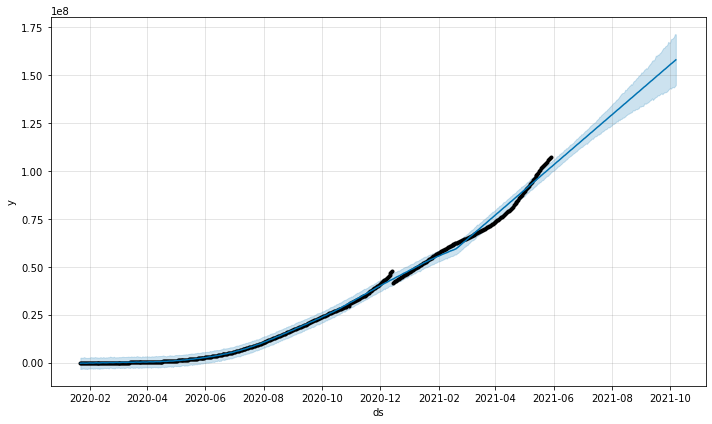

In [43]:
recovered_forecast_plot = m.plot(forecast)

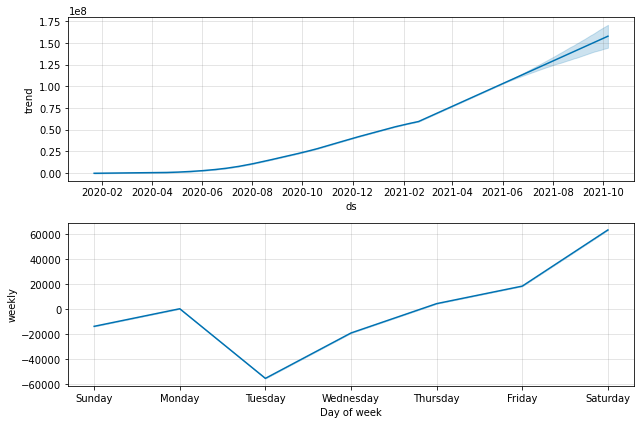

In [45]:
recovered_forecast_plot = m.plot_components(forecast)